<a href="https://colab.research.google.com/github/mtsilimos/Codesnippets_Sentence-Embeddings-for-the-Classification-of-Explicit-Fine-grained-Discourse-Relations/blob/main/blstimearlystopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [181]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/finalcorpus.csv', ';', encoding= 'unicode_escape')

<ipython-input-181-d19ce2d20660>:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('/content/drive/My Drive/finalcorpus.csv', ';', encoding= 'unicode_escape')


In [182]:
X = df['text']
y = df['label']

In [183]:
vocab_size= 20000
from tensorflow.keras.preprocessing.text import one_hot
encoding = [one_hot(d,vocab_size) for d in df['text']]

In [184]:

from tensorflow.keras.preprocessing.sequence import pad_sequences
emb_doc = pad_sequences(encoding,padding='pre',maxlen=50)

In [185]:
import numpy as np
final_x = np.array(emb_doc)
final_y = np.array(y)

In [186]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=0,
    min_delta=0.001,
    mode='max'
)

model = Sequential()
model.add(Embedding(vocab_size, output_dim=32, input_length=50))
model.add(Bidirectional(LSTM(20)))
model.add(Dropout(0.5))
model.add(Dense(6,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy')]

model.compile(optimizer='adam',
 loss='binary_crossentropy',
 metrics=METRICS)

model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_30 (Embedding)    (None, 50, 32)            640000    
                                                                 
 bidirectional_30 (Bidirect  (None, 40)                8480      
 ional)                                                          
                                                                 
 dropout_28 (Dropout)        (None, 40)                0         
                                                                 
 dense_85 (Dense)            (None, 6)                 246       
                                                                 
 dropout_29 (Dropout)        (None, 6)                 0         
                                                                 
 dense_86 (Dense)            (None, 4)                 28        
                                                     

In [187]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(final_x, final_y, test_size=0.20, random_state=42)



In [188]:

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), shuffle =  True, epochs=10, batch_size=64, callbacks=[early_stopping])

Epoch 1/10
25/25 [==============================] - 8s 159ms/step - loss: 0.6928 - accuracy: 0.5050 - val_loss: 0.6914 - val_accuracy: 0.4975
Epoch 2/10
25/25 [==============================] - 2s 86ms/step - loss: 0.6893 - accuracy: 0.5381 - val_loss: 0.6819 - val_accuracy: 0.5550
Epoch 3/10
25/25 [==============================] - 4s 169ms/step - loss: 0.6719 - accuracy: 0.5806 - val_loss: 0.6340 - val_accuracy: 0.6750
Epoch 4/10
25/25 [==============================] - 2s 65ms/step - loss: 0.6223 - accuracy: 0.6600 - val_loss: 0.5138 - val_accuracy: 0.8000
Epoch 5/10
25/25 [==============================] - 1s 52ms/step - loss: 0.5680 - accuracy: 0.7506 - val_loss: 0.4597 - val_accuracy: 0.8300
Epoch 6/10
25/25 [==============================] - 1s 51ms/step - loss: 0.5312 - accuracy: 0.7781 - val_loss: 0.4321 - val_accuracy: 0.8850
Epoch 7/10
25/25 [==============================] - 1s 31ms/step - loss: 0.5132 - accuracy: 0.7894 - val_loss: 0.4233 - val_accuracy: 0.8750


In [189]:
model.evaluate(x_train, y_train)

50/50 [==============================] - 0s 5ms/step - loss: 0.3858 - accuracy: 0.9569


[0.3857984244823456, 0.9568750262260437]

In [190]:

model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 6ms/step - loss: 0.4233 - accuracy: 0.8750


[0.42330458760261536, 0.875]

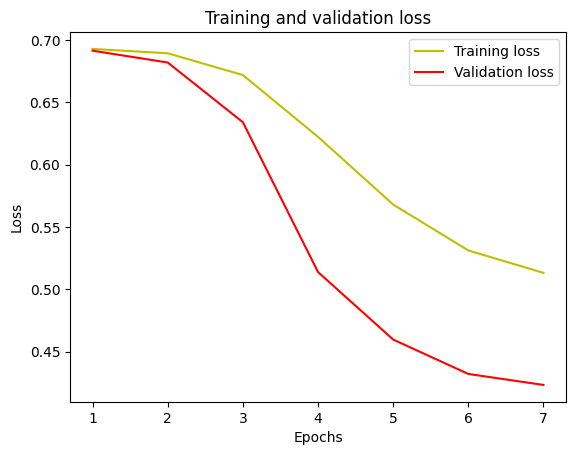

In [191]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

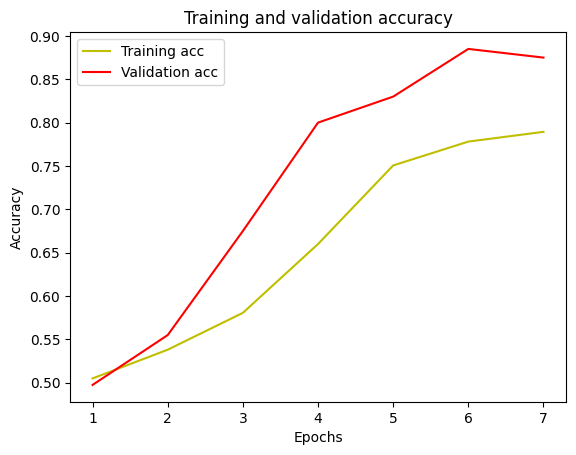

In [192]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()